In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87])

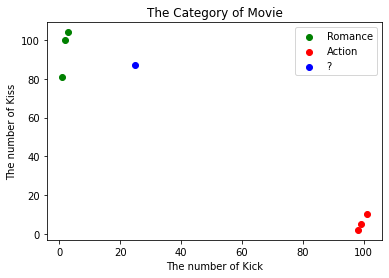

In [3]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

In [4]:
# broadcasting을 이용하면 보다 간결하고 빠른 코드를 작성할 수 있습니다.
## ⚠️⚠️⚠️ 반복문, 순회문 사용하지 않고 numpy broadcasting 을 사용해 구현하세요. ⚠️⚠️⚠️

# 위 정의한 inX와 그 이외의 모든 점들과의 거리를 계산합니다. 
# 거리는 위 정의한 l2 distance 을 사용합니다. 
dists = dataset - inX
dists = np.array(np.sqrt(dists[:,0]**2 + dists[:,1]**2))
dists

array([ 27.80287755,  26.41968963,  24.73863375, 108.1896483 ,
       110.45361017, 112.04463396])

In [5]:
# 오름차순으로 정렬된 인덱스 순을 반환
# numpy 을 사용해 위 생성한 거리(dists) 에서 거리가 가장 짧은 데이터의 index을 정렬(sort) 합니다. 
sorted_index = np.argsort(dists)
sorted_index

array([2, 1, 0, 3, 4, 5], dtype=int64)

In [6]:
# 위 생성한 sorted index 을 사용해 거리가 가장 짧은 순서대로 labels 을 나열합니다. 
sorted_labels = labels[sorted_index]
# 위 생성한 sorted_labels 을 활용해 거리가 가장 가까운 k=4 개의 데이터를 가져옵니다. 
K_nearest_labels = sorted_labels[:4]

In [7]:
K_nearest_labels


array(['Romance', 'Romance', 'Romance', 'Action'], dtype='<U7')

In [8]:
# K 개의 아이템에서 각 항목이 몇번씩 등작했는지 count합니다. 
count_dict = {}

for label in K_nearest_labels:
    try: count_dict[label] += 1
    except: count_dict[label] = 1

count_dict

{'Romance': 3, 'Action': 1}

In [9]:
# 제일 많이 등장한 횟수를 찾아 반환합니다. 
# 해당 예제에서는 Romance 을 반환해야 합니다. 
# np.unique 함수를 사용해야 합니다. 
_labels, count_labels = np.unique(K_nearest_labels, return_counts=True)
_labels[count_labels.argmax()]

'Romance'

In [10]:
def classify_knn(inX, dataset, labels, K):
    dists = dataset - inX
    dists = np.array(np.sqrt(dists[:,0]**2 + dists[:,1]**2))
    
    sorted_index = np.argsort(dists)

    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:4]
    
    _labels, count_labels = np.unique(K_nearest_labels, return_counts=True)
    _labels[count_labels.argmax()]

    return _labels[count_labels.argmax()]

In [11]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
classify_knn([52, 10], dataset, labels, 4)

'Action'

In [12]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
classify_knn([19, 72], dataset, labels, 4)

'Romance'